
***
#Reconnaissance Écriture Manuscrite (OCR) avec EasyOCR,Keras-OCR et tesseract
***





In [3]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image


In [33]:
image_path = '/content/Genova.png'
img = cv2.imread(image_path)


# **Plot Example Images**

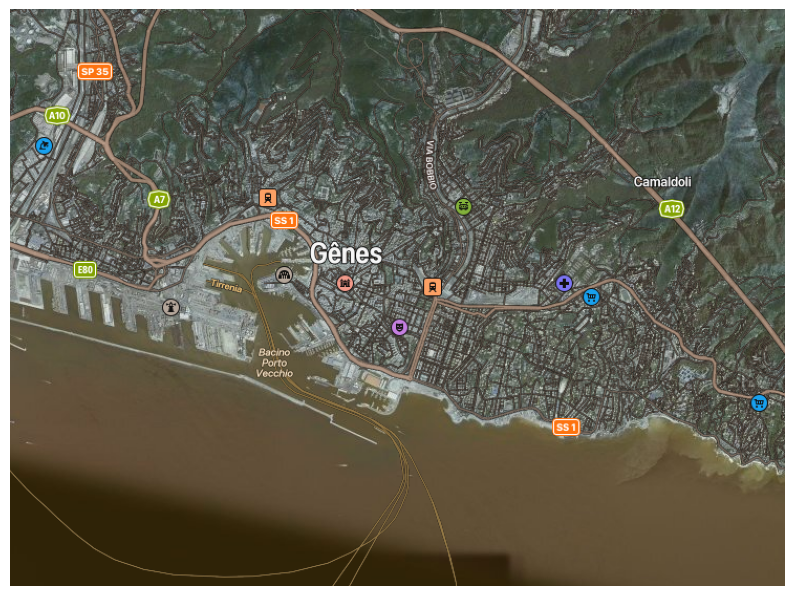

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.axis('off')
plt.show()

# **`Méthode 1:easyocr`**


In [7]:
!pip install easyocr

In [29]:
import easyocr


img_easyocr=img
reader = easyocr.Reader(['fr', 'en'], gpu=True)  #  Français et Anglais
results = reader.readtext(img_easyocr, detail=1, paragraph=False) #Définissez les détails sur 0 pour une sortie de texte simple
#Paragraph=True combinera tous les résultats, ce qui facilitera leur capture dans un dataframe.


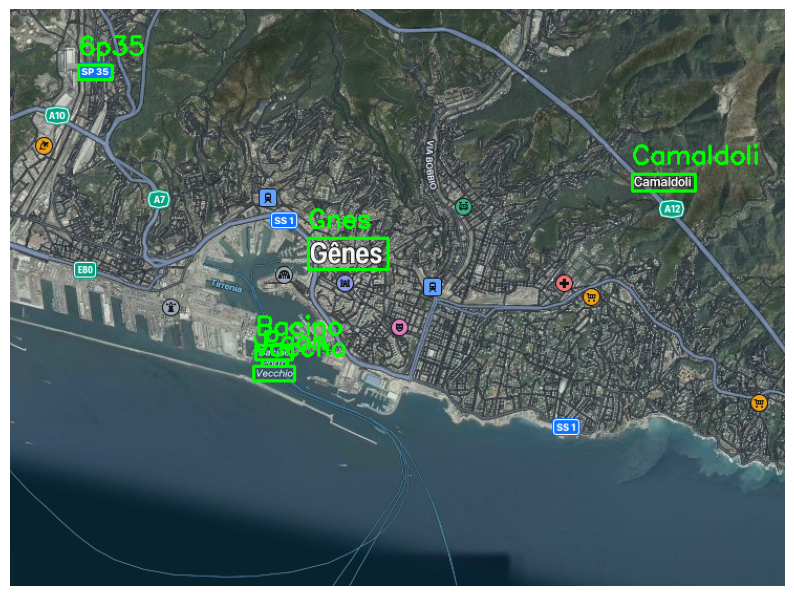

In [30]:
for indx, (bbox, text, prob) in enumerate(results):

        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        text = "".join([c if ord(c) < 130 else "" for c in text]).strip()

        cv2.rectangle(img_easyocr, tl, br, (0, 255, 0), 2)
        cv2.putText(img_easyocr, text, (tl[0], tl[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
        #print(f'Probabilite box {text} {indx} egale: {prob}')



fig ,ax = plt.subplots(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_easyocr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [26]:
easyocr_results=pd.DataFrame(results, columns=['bbox','text','conf'])
easyocr_results.to_json('easyocr_results.json', orient='records', lines=True)



In [27]:
print(easyocr_results)

                                               bbox        text      conf
0        [[61, 18], [134, 18], [134, 57], [61, 57]]       BPB5l  0.136120
1          [[67, 55], [97, 55], [97, 67], [67, 67]]      Sp 35/  0.231266
2  [[590, 124], [720, 124], [720, 156], [590, 156]]   Camaldoli  0.998946
3  [[595, 157], [653, 157], [653, 173], [595, 173]]  Camaldoli]  0.685463
4  [[282, 188], [348, 188], [348, 216], [282, 216]]        Gneg  0.526001
5  [[282, 218], [362, 218], [362, 248], [282, 248]]       Gênes  0.999925
6  [[231, 289], [287, 289], [287, 325], [231, 325]]        Bgsi  0.163015
7  [[241, 321], [271, 321], [271, 335], [241, 335]]          4'  0.244907
8  [[233, 341], [273, 341], [273, 355], [233, 355]]      Veccng  0.124875


# **Méthode 2: keras_ocr**


In [20]:
!pip install keras-ocr -q

In [22]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 0s 106ms/step


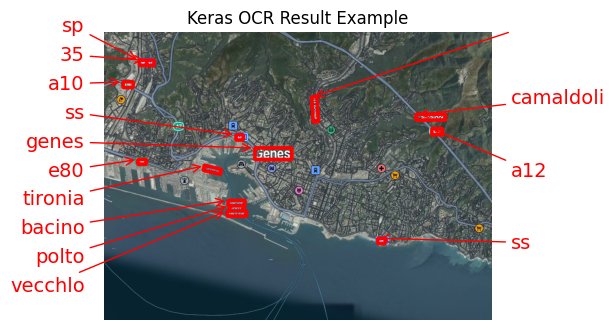

In [36]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_rgb=img

# Redimensionner l'image
max_size = 3000
if max(img_rgb.shape) > max_size:
    scale = max_size / max(img_rgb.shape)
    img_rgb = cv2.resize(img_rgb, (int(img_rgb.shape[1] * scale), int(img_rgb.shape[0] * scale)))

# Reconnaître le texte dans l'image
results = pipeline.recognize([img_rgb])


fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_rgb)
keras_ocr.tools.drawAnnotations(image=img_rgb, predictions=results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.axis('off')
plt.show()


In [35]:
keras_ocr_results = pd.DataFrame(results[0], columns=['text', 'bbox'])
print(keras_ocr_results)
# Enregistrer le DataFrame au format JSON
keras_ocr_results.to_json('keras_ocr_results.json', orient='records', lines=True)


         text                                               bbox
0          sp  [[67.0, 55.0], [81.0, 55.0], [81.0, 65.0], [67...
1          35  [[81.0, 55.0], [95.0, 55.0], [95.0, 65.0], [81...
2         a10  [[36.0, 96.0], [55.0, 96.0], [55.0, 107.0], [3...
3              [[395.74414, 125.256386], [405.89075, 124.7614...
4   camaldoli  [[594.99994, 158.99998], [650.99994, 158.99998...
5         a12  [[624.0, 185.0], [644.0, 185.0], [644.0, 197.0...
6          ss  [[251.0, 197.0], [265.0, 197.0], [265.0, 207.0...
7       genes  [[287.0, 222.0], [357.0, 222.0], [357.0, 244.0...
8         e80  [[64.0, 244.0], [80.0, 244.0], [80.0, 253.0], ...
9     tironia  [[191.54724, 255.7017], [223.81332, 263.38412]...
10     bacino  [[236.0, 322.0], [268.0, 322.0], [268.0, 332.0...
11      polto  [[239.0, 332.0], [265.0, 332.0], [265.0, 342.0...
12    vecchlo  [[234.0, 342.0], [271.0, 342.0], [271.0, 352.0...
13         ss  [[521.0, 394.0], [535.0, 394.0], [535.0, 404.0...


In [37]:
#pip install pytesseract opencv-python-headless


In [39]:
# Installer Tesseract
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y libtesseract-dev


!pip install pytesseract


!pip install tabula-py


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading pac

Texte extrait:  

 



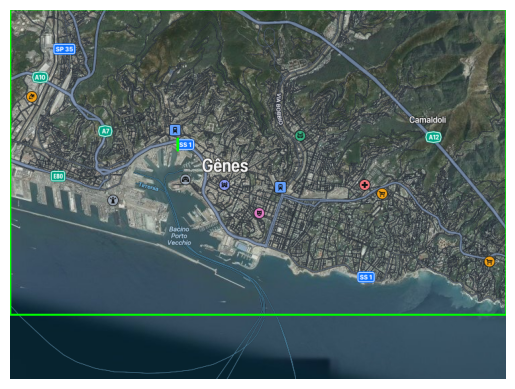

In [40]:
import cv2
import pytesseract


image='/content/Genova.png'
# Charger l'image
img = cv2.imread(image_path)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


text = pytesseract.image_to_string(gray)
print("Texte extrait:", text)


boxes = pytesseract.image_to_boxes(gray)
h, w, _ = img.shape

for box in boxes.splitlines():
    box = box.split(' ')
    img = cv2.rectangle(img, (int(box[1]), h - int(box[2])), (int(box[3]), h - int(box[4])), (0, 255, 0), 2)


import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Texte extrait: EQUIPEMENTS

SUR OUVRAGE

. Chaussée
. Trottoirs et bordures
. Dispositifs de retenue

. Corniches

. Dispositifs d'évacuation des eaux

. Joints de chaussée et de trottoirs

. Autres équipements sur ouvrage

 



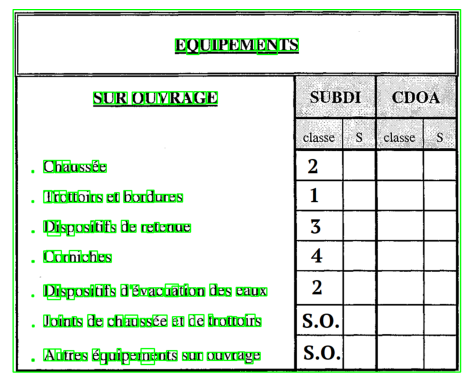

In [41]:
import cv2
import pytesseract

image_path = '/content/Extrait_IQOA_data.png'

img = cv2.imread(image_path)

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer l'OCR pour extraire le texte
text = pytesseract.image_to_string(gray)
print("Texte extrait:", text)

boxes = pytesseract.image_to_boxes(gray)
h, w, _ = img.shape

for box in boxes.splitlines():
    box = box.split(' ')
    img = cv2.rectangle(img, (int(box[1]), h - int(box[2])), (int(box[3]), h - int(box[4])), (0, 255, 0), 2)

import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
